# 3.11 ~ 3.17 단순 선형 회귀(넘파이)

In [8]:
import numpy as np

from matplotlib import pyplot as plt

In [3]:
# 데이터 선언

x = np.array(
    [[1], [2], [3], [4], [5], [6], [7], [8], [9], [10],
    [11], [12], [13], [14], [15], [16], [17], [18], [19], [20],
    [21], [22], [23], [24], [25], [26], [27], [28], [29], [30]]
)
y = np.array(
    [[0.94], [1.98], [2.88], [3.92], [3.96], [4.55], [5.64], [6.3], [7.44], [9.1],
    [8.46], [9.5], [10.67], [11.16], [14], [11.83], [14.4], [14.25], [16.2], [16.32],
    [17.46], [19.8], [18], [21.34], [22], [22.5], [24.57], [26.04], [21.6], [28.8]]
)

In [4]:
print(x.shape, y.shape)

(30, 1) (30, 1)


In [5]:
# 하이퍼 파라미터 초기화

weight = 0.0
bias = 0.0
learning_rate = 0.005

In [6]:
# 에폭 설정
for epoch in range(10000):
  # 가설과 손실 함수 선언
  y_hat = weight * x + bias
  cost = ((y - y_hat) ** 2).mean() # RMSE
  # 가중치와 편향 갱신
  weight = weight - learning_rate * ((y_hat - y) * x).mean()
  bias = bias - learning_rate * ((y_hat - y).mean())
  # 학습 기록 출력
  if (epoch + 1) % 1000 == 0:
    print(f"Epoch : {epoch+1:4d}, Weight : {weight:.3f}, Bias : {bias:.3f}, Cost : {cost:.3f}")

Epoch : 1000, Weight : 0.872, Bias : -0.290, Cost : 1.377
Epoch : 2000, Weight : 0.877, Bias : -0.391, Cost : 1.373
Epoch : 3000, Weight : 0.878, Bias : -0.422, Cost : 1.372
Epoch : 4000, Weight : 0.879, Bias : -0.432, Cost : 1.372
Epoch : 5000, Weight : 0.879, Bias : -0.435, Cost : 1.372
Epoch : 6000, Weight : 0.879, Bias : -0.436, Cost : 1.372
Epoch : 7000, Weight : 0.879, Bias : -0.436, Cost : 1.372
Epoch : 8000, Weight : 0.879, Bias : -0.436, Cost : 1.372
Epoch : 9000, Weight : 0.879, Bias : -0.436, Cost : 1.372
Epoch : 10000, Weight : 0.879, Bias : -0.436, Cost : 1.372


## 초깃값에 따른 학습 결과

In [38]:
def fit_and_plot(learning_rate=0.005, weight=0.0, bias=0.0):
  weights = []
  biases = []
  costs = []
  # 하이퍼 파라미터 초기화
  weight = weight
  bias = bias
  for epoch in range(10):
    # 가설과 손실 함수 선언
    y_hat = weight * x + bias
    cost = ((y - y_hat) ** 2).mean() # RMSE
    costs.append(cost)
    # 가중치와 편향 갱신
    weight = weight - learning_rate * ((y_hat - y) * x).mean()
    weights.append(weight)
    bias = bias - learning_rate * ((y_hat - y).mean())
    biases.append(bias)
    print(f"Epoch : {epoch+1:4d}, Weight : {weight:.3f}, Bias : {bias:.3f}, Cost : {cost:.3f}")

  fig, ax = plt.subplots(3, 1, figsize=(8, 6))
  fig.suptitle(f"Learning Rate : {learning_rate}")
  for i, (data, name) in enumerate(zip([weights, biases, costs], ['weight', 'bias', 'cost'])):
    ax[i].plot(data, marker='o', label=name)
    ax[i].legend()
  plt.tight_layout()
  plt.show()

Epoch :    1, Weight : 1.351, Bias : 0.066, Cost : 233.140
Epoch :    2, Weight : 0.568, Bias : 0.027, Cost : 79.280
Epoch :    3, Weight : 1.022, Bias : 0.049, Cost : 27.584
Epoch :    4, Weight : 0.759, Bias : 0.035, Cost : 10.215
Epoch :    5, Weight : 0.911, Bias : 0.042, Cost : 4.379
Epoch :    6, Weight : 0.823, Bias : 0.037, Cost : 2.418
Epoch :    7, Weight : 0.874, Bias : 0.039, Cost : 1.759
Epoch :    8, Weight : 0.845, Bias : 0.037, Cost : 1.538
Epoch :    9, Weight : 0.862, Bias : 0.037, Cost : 1.463
Epoch :   10, Weight : 0.852, Bias : 0.036, Cost : 1.438


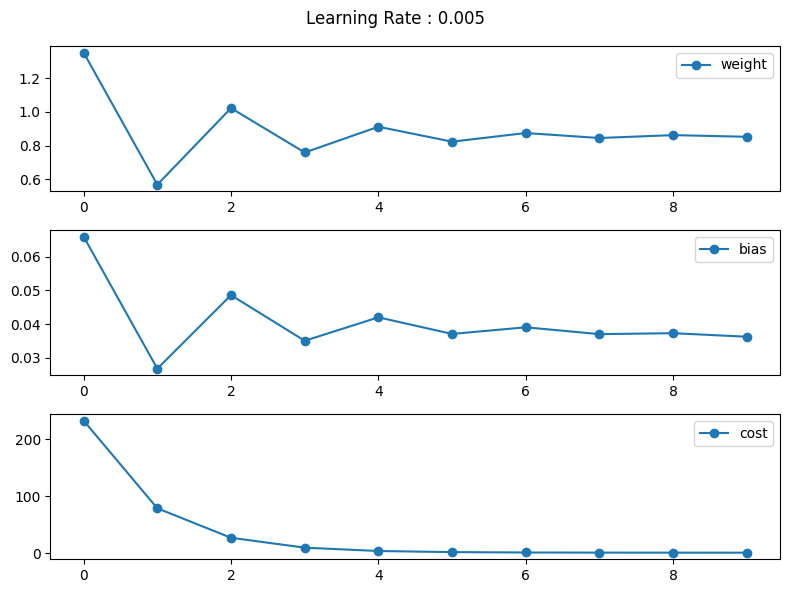

In [39]:
fit_and_plot(learning_rate=0.005)

Epoch :    1, Weight : 0.270, Bias : 0.013, Cost : 233.140
Epoch :    2, Weight : 0.455, Bias : 0.022, Cost : 109.857
Epoch :    3, Weight : 0.582, Bias : 0.028, Cost : 52.167
Epoch :    4, Weight : 0.668, Bias : 0.032, Cost : 25.171
Epoch :    5, Weight : 0.727, Bias : 0.035, Cost : 12.538
Epoch :    6, Weight : 0.768, Bias : 0.037, Cost : 6.626
Epoch :    7, Weight : 0.795, Bias : 0.038, Cost : 3.859
Epoch :    8, Weight : 0.814, Bias : 0.039, Cost : 2.565
Epoch :    9, Weight : 0.827, Bias : 0.040, Cost : 1.959
Epoch :   10, Weight : 0.836, Bias : 0.040, Cost : 1.676


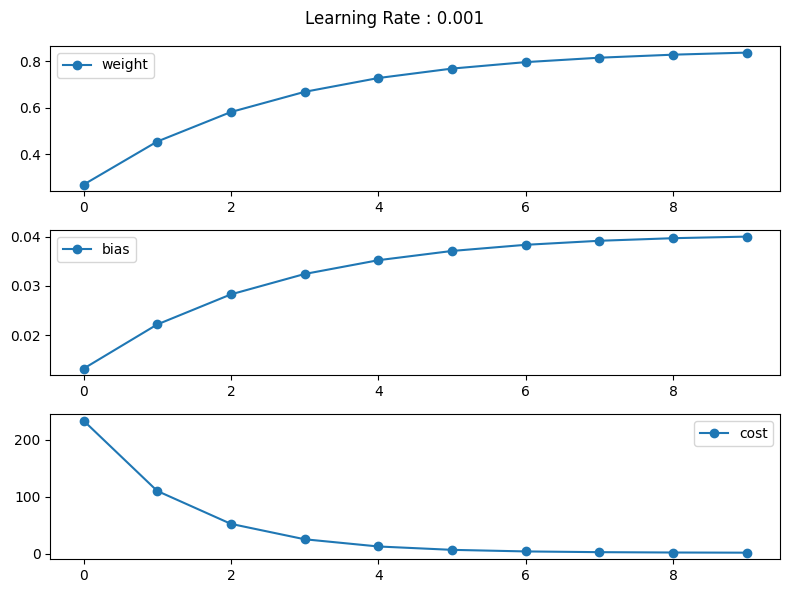

In [40]:
fit_and_plot(learning_rate=0.001)

cost가 더 느리게 감소한다.

Epoch :    1, Weight : 1.621, Bias : 0.079, Cost : 233.140
Epoch :    2, Weight : 0.169, Bias : 0.007, Cost : 187.274
Epoch :    3, Weight : 1.470, Bias : 0.070, Cost : 150.487
Epoch :    4, Weight : 0.305, Bias : 0.012, Cost : 120.981
Epoch :    5, Weight : 1.348, Bias : 0.063, Cost : 97.316
Epoch :    6, Weight : 0.414, Bias : 0.016, Cost : 78.335
Epoch :    7, Weight : 1.251, Bias : 0.057, Cost : 63.112
Epoch :    8, Weight : 0.502, Bias : 0.019, Cost : 50.901
Epoch :    9, Weight : 1.173, Bias : 0.052, Cost : 41.108
Epoch :   10, Weight : 0.572, Bias : 0.021, Cost : 33.253


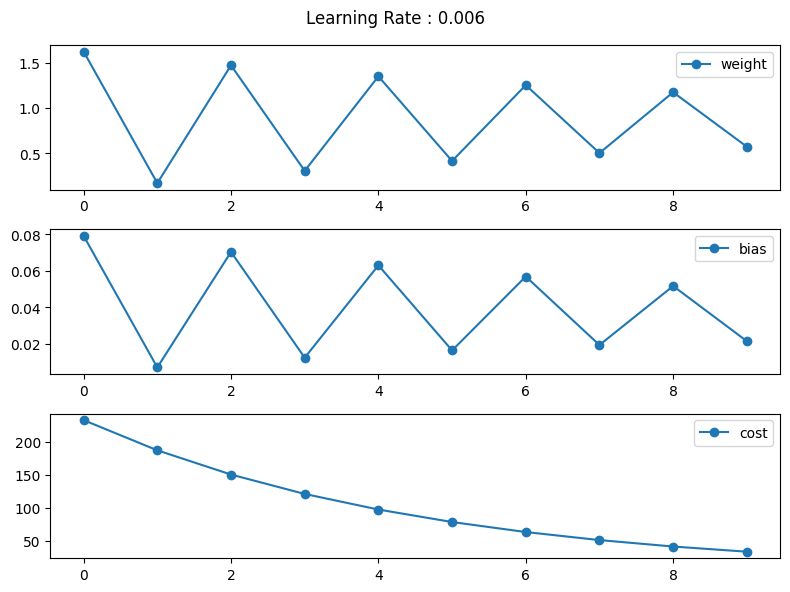

In [41]:
fit_and_plot(learning_rate=0.006)

- 오차가 감소하기는 하지만 가중치나 편향이 지그재그 형태로 움직인다.
- 학습률이 높을 때의 결과로 볼 수 있다.

Epoch :    1, Weight : 1.892, Bias : 0.092, Cost : 233.140
Epoch :    2, Weight : -0.400, Bias : -0.021, Cost : 341.523
Epoch :    3, Weight : 2.376, Bias : 0.115, Cost : 500.602
Epoch :    4, Weight : -0.987, Bias : -0.052, Cost : 734.091
Epoch :    5, Weight : 3.088, Bias : 0.148, Cost : 1076.794
Epoch :    6, Weight : -1.849, Bias : -0.096, Cost : 1579.796
Epoch :    7, Weight : 4.132, Bias : 0.198, Cost : 2318.076
Epoch :    8, Weight : -3.114, Bias : -0.160, Cost : 3401.685
Epoch :    9, Weight : 5.665, Bias : 0.272, Cost : 4992.152
Epoch :   10, Weight : -4.971, Bias : -0.253, Cost : 7326.558


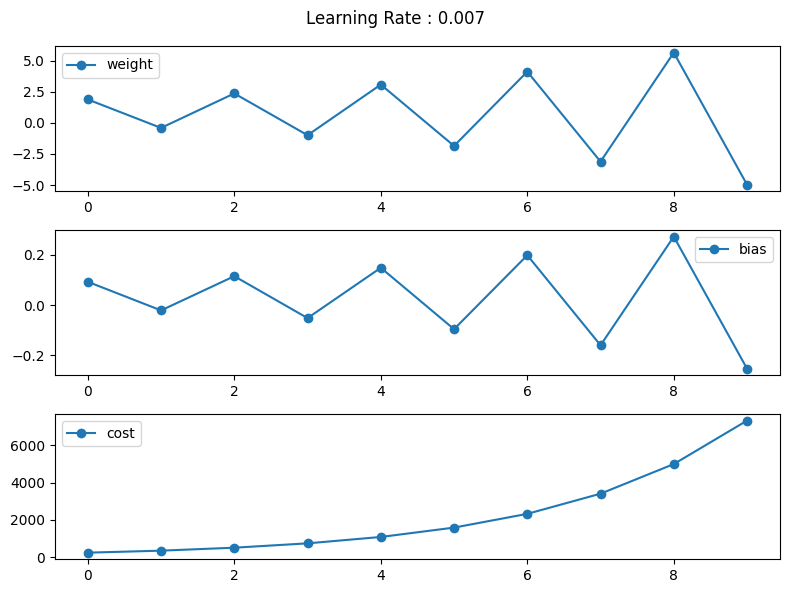

In [42]:
fit_and_plot(learning_rate=0.007)

- 오차가 점점 증가하고, 가중치와 편향이 적절한 값에서 점점 멀어진다.

가중치와 편향의 초깃값이 매우 클 때

Epoch :    1, Weight : -65331.982, Bias : 91750.066, Cost : 3471609980966.473
Epoch :    2, Weight : 30511.054, Bias : 96354.610, Cost : 1167846104927.318
Epoch :    3, Weight : -25035.413, Bias : 93508.296, Cost : 393797829516.361
Epoch :    4, Weight : 7170.684, Bias : 94981.065, Cost : 133720896289.252
Epoch :    5, Weight : -11488.800, Bias : 93950.498, Cost : 46333937931.186
Epoch :    6, Weight : -664.178, Bias : 94371.193, Cost : 16969339320.910
Epoch :    7, Weight : -6929.960, Bias : 93950.877, Cost : 7099764303.827
Epoch :    8, Weight : -3289.340, Bias : 94018.261, Cost : 3780358039.956
Epoch :    9, Weight : -5390.953, Bias : 93803.159, Cost : 2661760204.138
Epoch :   10, Weight : -4164.103, Bias : 93752.008, Cost : 2282622976.588


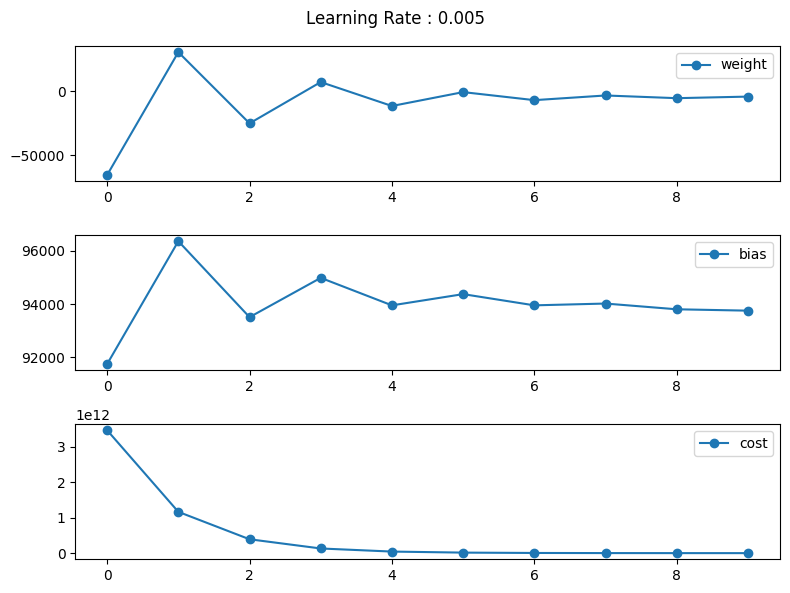

In [43]:
fit_and_plot(learning_rate=0.005, weight=100000.0, bias=100000.0)

오차가 감소하기는 하지만 매우 많은 학습을 요구

# 3.18 ~3.24 단순 선형 회귀(파이토치)

In [44]:
import torch
from torch import optim

In [46]:
# 데이터 선언

x = torch.FloatTensor([
    [1], [2], [3], [4], [5], [6], [7], [8], [9], [10],
    [11], [12], [13], [14], [15], [16], [17], [18], [19], [20],
    [21], [22], [23], [24], [25], [26], [27], [28], [29], [30]
])
y = torch.FloatTensor([
    [0.94], [1.98], [2.88], [3.92], [3.96], [4.55], [5.64], [6.3], [7.44], [9.1],
    [8.46], [9.5], [10.67], [11.16], [14], [11.83], [14.4], [14.25], [16.2], [16.32],
    [17.46], [19.8], [18], [21.34], [22], [22.5], [24.57], [26.04], [21.6], [28.8]
])

In [51]:
# 하이퍼파라미터 초기화

weight = torch.zeros(1, requires_grad=True)
bias = torch.zeros(1, requires_grad=True)
learning_rate = 0.001

In [52]:
# 최적화 선언

optimizer = optim.SGD([weight, bias], lr=learning_rate)

In [53]:
# 에폭, 가설, 손실 함수 선언

for epoch in range(10000):
  hypothesis = weight * x + bias
  cost = torch.mean((hypothesis - y) ** 2)
  # 가중치와 편향 갱신
  optimizer.zero_grad()
  cost.backward()
  optimizer.step()
  # 학습 기록 출력
  if (epoch + 1) % 1000 == 0:
        print(f"Epoch : {epoch+1:4d}, Weight : {weight.item():.3f}, Bias : {bias.item():.3f}, Cost : {cost:.3f}")

Epoch : 1000, Weight : 0.864, Bias : -0.138, Cost : 1.393
Epoch : 2000, Weight : 0.870, Bias : -0.251, Cost : 1.380
Epoch : 3000, Weight : 0.873, Bias : -0.321, Cost : 1.375
Epoch : 4000, Weight : 0.875, Bias : -0.364, Cost : 1.373
Epoch : 5000, Weight : 0.877, Bias : -0.391, Cost : 1.373
Epoch : 6000, Weight : 0.878, Bias : -0.408, Cost : 1.372
Epoch : 7000, Weight : 0.878, Bias : -0.419, Cost : 1.372
Epoch : 8000, Weight : 0.878, Bias : -0.425, Cost : 1.372
Epoch : 9000, Weight : 0.879, Bias : -0.429, Cost : 1.372
Epoch : 10000, Weight : 0.879, Bias : -0.432, Cost : 1.372


# 3.25 zero_grad(), cost.backward(), optimizer.step() 알아보기

In [54]:
x = torch.FloatTensor([
    [1], [2], [3], [4], [5], [6], [7], [8], [9], [10],
    [11], [12], [13], [14], [15], [16], [17], [18], [19], [20],
    [21], [22], [23], [24], [25], [26], [27], [28], [29], [30]
])
y = torch.FloatTensor([
    [0.94], [1.98], [2.88], [3.92], [3.96], [4.55], [5.64], [6.3], [7.44], [9.1],
    [8.46], [9.5], [10.67], [11.16], [14], [11.83], [14.4], [14.25], [16.2], [16.32],
    [17.46], [19.8], [18], [21.34], [22], [22.5], [24.57], [26.04], [21.6], [28.8]
])

weight = torch.zeros(1, requires_grad=True)
bias = torch.zeros(1, requires_grad=True)
learning_rate = 0.001

optimizer = optim.SGD([weight, bias], lr=learning_rate)

for epoch in range(10000):
    hypothesis = weight * x + bias
    cost = torch.mean((hypothesis - y) ** 2)

    print(f"Epoch : {epoch+1:4d}")
    print(f"Step [1] : Gradient : {weight.grad}, Weight : {weight.item():.5f}")

    optimizer.zero_grad()
    print(f"Step [2] : Gradient : {weight.grad}, Weight : {weight.item():.5f}")

    cost.backward()
    print(f"Step [3] : Gradient : {weight.grad}, Weight : {weight.item():.5f}")

    optimizer.step()
    print(f"Step [4] : Gradient : {weight.grad}, Weight : {weight.item():.5f}")

    if epoch == 3:
        break

Epoch :    1
Step [1] : Gradient : None, Weight : 0.00000
Step [2] : Gradient : None, Weight : 0.00000
Step [3] : Gradient : tensor([-540.4854]), Weight : 0.00000
Step [4] : Gradient : tensor([-540.4854]), Weight : 0.54049
Epoch :    2
Step [1] : Gradient : tensor([-540.4854]), Weight : 0.54049
Step [2] : Gradient : None, Weight : 0.54049
Step [3] : Gradient : tensor([-198.9818]), Weight : 0.54049
Step [4] : Gradient : tensor([-198.9818]), Weight : 0.73947
Epoch :    3
Step [1] : Gradient : tensor([-198.9818]), Weight : 0.73947
Step [2] : Gradient : None, Weight : 0.73947
Step [3] : Gradient : tensor([-73.2604]), Weight : 0.73947
Step [4] : Gradient : tensor([-73.2604]), Weight : 0.81273
Epoch :    4
Step [1] : Gradient : tensor([-73.2604]), Weight : 0.81273
Step [2] : Gradient : None, Weight : 0.81273
Step [3] : Gradient : tensor([-26.9772]), Weight : 0.81273
Step [4] : Gradient : tensor([-26.9772]), Weight : 0.83970


# 3.26 ~ 3.28 신경망 패키지

In [56]:
# 모델 선언
model = torch.nn.Linear(in_features=1, out_features=1,
                        bias=True, device=None, dtype=None)
# 오차 클래스
criterion = torch.nn.MSELoss()
# 최적화
optimizer = torch.optim.SGD(model.parameters(), lr=0.001)

# 학습
for epoch in range(10000):
    output = model(x)
    cost = criterion(output, y)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if (epoch + 1) % 1000 == 0:
        print(f"Epoch : {epoch+1:4d}\n Model : {list(model.parameters())}\n Cost : {cost:.3f}")

Epoch : 1000
 Model : [Parameter containing:
tensor([[0.8828]], requires_grad=True), Parameter containing:
tensor([-0.5149], requires_grad=True)]
 Cost : 1.374
Epoch : 2000
 Model : [Parameter containing:
tensor([[0.8813]], requires_grad=True), Parameter containing:
tensor([-0.4851], requires_grad=True)]
 Cost : 1.373
Epoch : 3000
 Model : [Parameter containing:
tensor([[0.8804]], requires_grad=True), Parameter containing:
tensor([-0.4665], requires_grad=True)]
 Cost : 1.372
Epoch : 4000
 Model : [Parameter containing:
tensor([[0.8798]], requires_grad=True), Parameter containing:
tensor([-0.4550], requires_grad=True)]
 Cost : 1.372
Epoch : 5000
 Model : [Parameter containing:
tensor([[0.8795]], requires_grad=True), Parameter containing:
tensor([-0.4478], requires_grad=True)]
 Cost : 1.372
Epoch : 6000
 Model : [Parameter containing:
tensor([[0.8793]], requires_grad=True), Parameter containing:
tensor([-0.4433], requires_grad=True)]
 Cost : 1.372
Epoch : 7000
 Model : [Parameter contain